In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Loading Dataset

Dataset provided is in the format (minute,location) . Each line represents location of person every minute.

The data is split day wise and then hour wise respectively.


In [2]:
dataset = pd.read_csv('./locations.min' , names=['location', 'time'])
dataset['time'] = dataset.index
dataset['time'] = pd.to_timedelta(dataset['time'], unit='m')
    
split_dataset = pd.DataFrame()

hour_dataset = pd.DataFrame()

for count, x in enumerate(range(0,161281,1440)):
    if x == 0:
        pass
    else:
        split_dataset['day'+str(count)] = dataset[x-1440:x]['location'].as_matrix()
        hour_list = []
        for hr_count, hour in enumerate(range(0, 1441, 60)):
            if hour == 0:
                pass
            else:
                L = split_dataset['day'+str(count)][hour-60:hour].as_matrix()
                #Finding the maximum occurance each hour
                hour_list.append(Counter(L).most_common(1)[0][0])
        
        hour_dataset[count] = hour_list
print(hour_dataset.shape)


(24, 112)


In [3]:
training_days_dataset = hour_dataset.loc[:,:50].as_matrix()
training_days_dataset = training_days_dataset.T
training_days_dataset.shape

(50, 24)

In [4]:
# Constants for learning

n_timeIntervals = 24
n_trials = 50        # Each trial is single day readings. we will use 50 days readings for learning
n_locations = 10 

In [5]:
from bayespy import nodes
import numpy as np

p_theta = nodes.Dirichlet(np.ones(n_locations),
                          plates=(n_timeIntervals,),
                          name='p_theta')

location_model = nodes.Categorical(p_theta,
                        plates=(n_trials,n_timeIntervals),
                        name='location_model')
location_model.plates

(50, 24)

In [6]:
location_model.observe(training_days_dataset)

# Inference

In [7]:
from bayespy.inference import VB
Q = VB(location_model, p_theta)

In [8]:
Q.update(repeat=1000)

Iteration 1: loglike=-1.411918e+03 (0.000 seconds)
Iteration 2: loglike=-1.411918e+03 (0.010 seconds)
Converged at iteration 2.


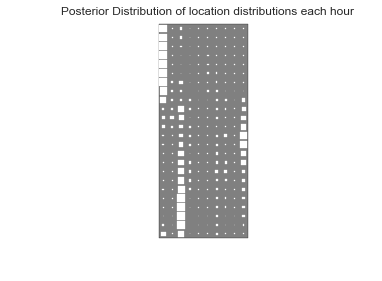

In [9]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(Q['p_theta'])
bpplt.pyplot.title('Posterior Distribution of location distributions each hour')
bpplt.pyplot.xlabel('Locations')
bpplt.pyplot.ylabel('timezone')
bpplt.pyplot.show()

In [30]:
location_prediction_model = nodes.Categorical(p_theta,
                    #    plates=(n_trials,n_timeIntervals),
                        name='location_prediction_model')
moments = location_prediction_model.get_moments()



array([2, 0, 0, 0, 0, 0, 2, 0, 9, 9, 2, 2, 9, 9, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2])

In [31]:
nodes.Categorical(p_theta).random()

array([0, 0, 0, 0, 0, 0, 7, 0, 8, 0, 0, 9, 3, 9, 9, 2, 9, 2, 2, 2, 2, 2, 5,
       2])